In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
sns.set_palette('Set3')

import missingno as msno
import warnings
warnings.filterwarnings('ignore')

import scipy.stats

plt.rcParams["font.family"] = "NanumBarunGothic"

from category_encoders.target_encoder import TargetEncoder

#### 1. 충청남도 천안시 카페 가맹점 데이터 분석

In [4]:
path = "C:/Cafe_Test"

# 데이터 URL : https://www.data.go.kr/data/15083033/fileData.do
Top_Lib = pd.read_csv(path + '/Chungnam_Market_2312.csv', encoding='CP949')

num_rows, num_columns = Top_Lib.shape

# 결과 출력
print(f"데이터 수: {num_rows}")

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

데이터 수: 111528


In [5]:
# information
Top_Lib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111528 entries, 0 to 111527
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     111528 non-null  object 
 1   상호명        111528 non-null  object 
 2   지점명        1679 non-null    object 
 3   상권업종대분류코드  111528 non-null  object 
 4   상권업종대분류명   111528 non-null  object 
 5   상권업종중분류코드  111528 non-null  object 
 6   상권업종중분류명   111528 non-null  object 
 7   상권업종소분류코드  111528 non-null  object 
 8   상권업종소분류명   111528 non-null  object 
 9   표준산업분류코드   111490 non-null  object 
 10  표준산업분류명    111490 non-null  object 
 11  시도코드       111528 non-null  int64  
 12  시도명        111528 non-null  object 
 13  시군구코드      111528 non-null  int64  
 14  시군구명       111528 non-null  object 
 15  행정동코드      111528 non-null  int64  
 16  행정동명       111528 non-null  object 
 17  법정동코드      111528 non-null  int64  
 18  법정동명       111528 non-null  object 
 19  지번코드       111528 non-n

<Axes: >

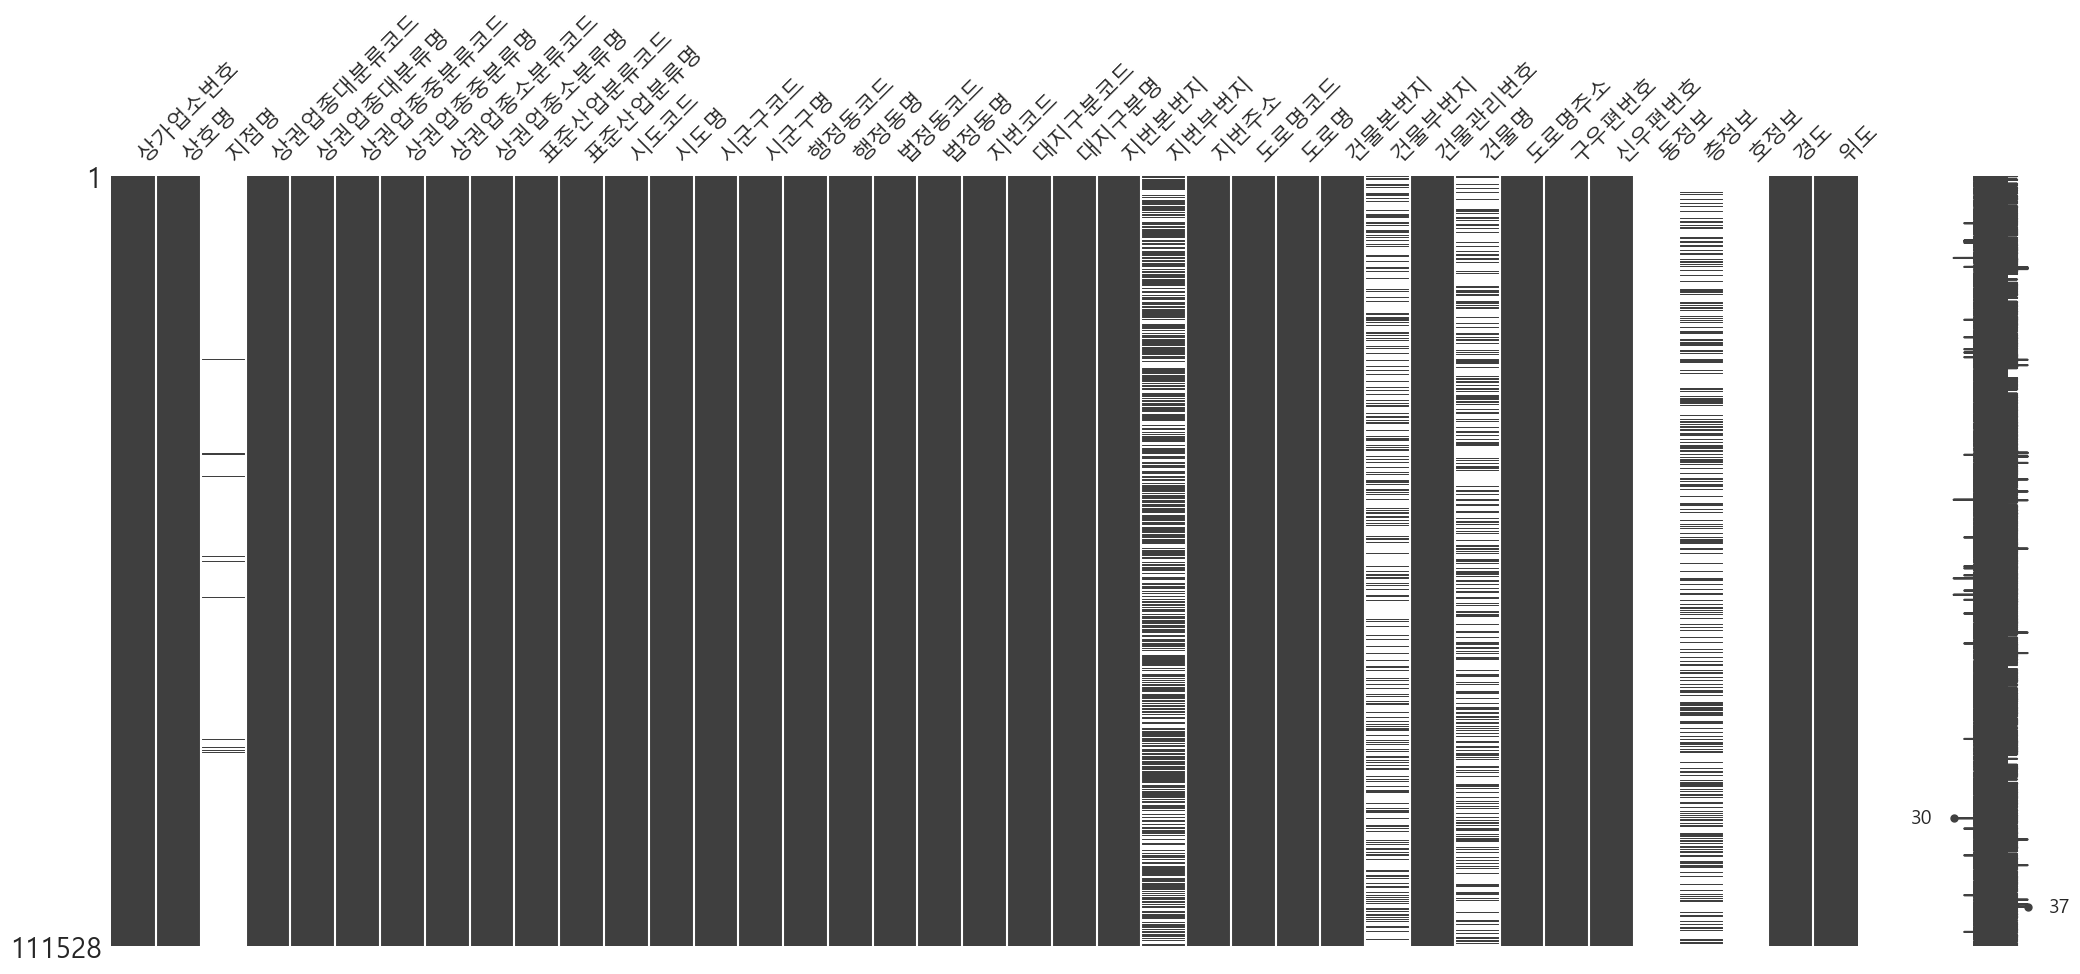

In [6]:
# 결측치 확인
msno.matrix(Top_Lib)

In [7]:
# 결측값 퍼센트 확인
cols = ['시도코드','시군구코드','행정동코드','법정동코드','지번코드','대지구분코드','지번본번지','지번부번지','도로명코드','건물본번지','건물부번지','구우편번호','신우편번호','동정보','호정보','경도','위도']

print("----------------------충청남도 소상공 데이터 결측치 확인----------------------")
for col in cols:  
    print(f"column : {col} Nan value percentage : {round(Top_Lib[col].isna().sum() / len(Top_Lib) * 100 , 2)}%")



print("")

----------------------충청남도 소상공 데이터 결측치 확인----------------------
column : 시도코드 Nan value percentage : 0.0%
column : 시군구코드 Nan value percentage : 0.0%
column : 행정동코드 Nan value percentage : 0.0%
column : 법정동코드 Nan value percentage : 0.0%
column : 지번코드 Nan value percentage : 0.0%
column : 대지구분코드 Nan value percentage : 0.0%
column : 지번본번지 Nan value percentage : 0.01%
column : 지번부번지 Nan value percentage : 32.99%
column : 도로명코드 Nan value percentage : 0.0%
column : 건물본번지 Nan value percentage : 0.0%
column : 건물부번지 Nan value percentage : 73.42%
column : 구우편번호 Nan value percentage : 0.0%
column : 신우편번호 Nan value percentage : 0.0%
column : 동정보 Nan value percentage : 100.0%
column : 호정보 Nan value percentage : 100.0%
column : 경도 Nan value percentage : 0.0%
column : 위도 Nan value percentage : 0.0%



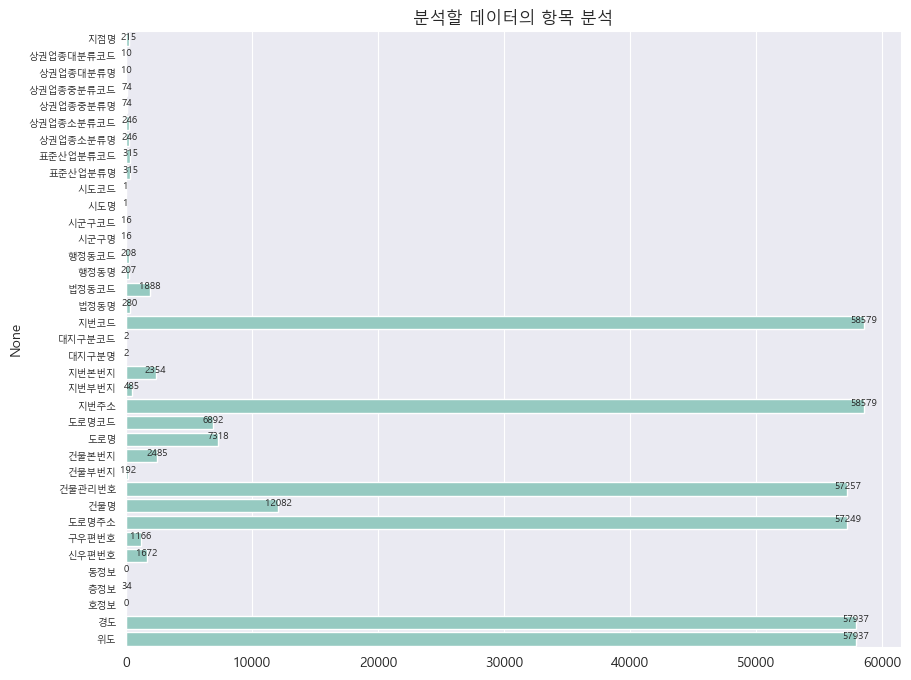

In [8]:
plt.figure(figsize=(10, 8))  # 그래프의 크기를 조절합니다.

g = sns.barplot(
    y=Top_Lib.nunique()[2:].index,
    x=Top_Lib.nunique()[2:].values
)

# 숫자 표시
for p in g.patches:
    g.text(
        p.get_x() + p.get_width(),
        p.get_y() + (p.get_height() / 2),
        f"{p.get_width():.0f}",
        ha='center',
        fontsize=7  # 폰트 크기를 조절합니다.
    )

g.set_title('분석할 데이터의 항목 분석')

# y 축의 눈금 레이블 크기 조정
g.tick_params(axis='y', labelsize=7)

plt.show()


In [9]:
### 2. 데이터 수치 살펴보기
Top_Lib.describe().style.background_gradient(cmap='pink_r')

,시도코드,시군구코드,행정동코드,법정동코드,지번코드,대지구분코드,지번본번지,지번부번지,도로명코드,건물본번지,건물부번지,구우편번호,신우편번호,동정보,호정보,경도,위도
count,111528.000000,111528.000000,111528.000000,111528.000000,111528.000000,111528.000000,111519.000000,74734.000000,111528.000000,111528.000000,29646.000000,111528.000000,111528.000000,0.000000,0.000000,111528.000000,111528.000000
mean,44.000000,44318.111972,44318537.654168,4431831664.023644,4431474890288554496.000000,1.002771,573.747397,16.222054,443184897314.721191,213.732856,13.509276,336681.289990,31984.753174,nan,nan,126.909370,36.649303
std,0.000000,257.644328,257564.820793,25769258.556313,47419416118701096.000000,0.052564,507.257009,48.217544,2576432001.217277,498.120594,20.136449,12890.282703,784.994023,nan,nan,0.294315,0.251211
min,44.000000,44131.000000,44131250.000000,4413110100.000000,442003302510000.000000,1.000000,1.000000,1.000000,441312249001.000000,1.000000,1.000000,312700.000000,31000.000000,nan,nan,126.064848,35.984224
25%,44.000000,44133.000000,44133580.000000,4413310800.000000,4413310800115369984.000000,1.000000,189.000000,2.000000,441334550330.000000,20.000000,3.000000,330730.000000,31197.000000,nan,nan,126.655367,36.466815
50%,44.000000,44200.000000,44200580.000000,4420033025.000000,4420033025106890240.000000,1.000000,424.000000,6.000000,442004559275.000000,53.000000,7.000000,331999.000000,31801.000000,nan,nan,127.021401,36.776534
75%,44.000000,44270.000000,44270510.000000,4427032021.000000,4427032021103495168.000000,1.000000,803.000000,13.000000,442704595182.000000,171.250000,16.000000,343925.000000,32569.000000,nan,nan,127.133856,36.817786
max,44.000000,44825.000000,44825360.000000,4482536025.000000,4482536025107040256.000000,2.000000,3920.000000,1576.000000,448254861378.000000,7522.000000,394.000000,357972.000000,33677.000000,nan,nan,127.622191,37.056555


In [10]:
# 천안시 서북구 동남구만 추출
Cheonan_Seo_dong = Top_Lib[Top_Lib['시군구명'].str.contains('천안시')]


# 충청남도 천안시 서북구 동남구의 카페, 토스트/샌드위치/샐러드, 빵/도넛, 생수/음료 소매업 추출
Cheonan_Seo_Dong_Cafe = Cheonan_Seo_dong[(Cheonan_Seo_dong['상권업종소분류명'] == '카페')]

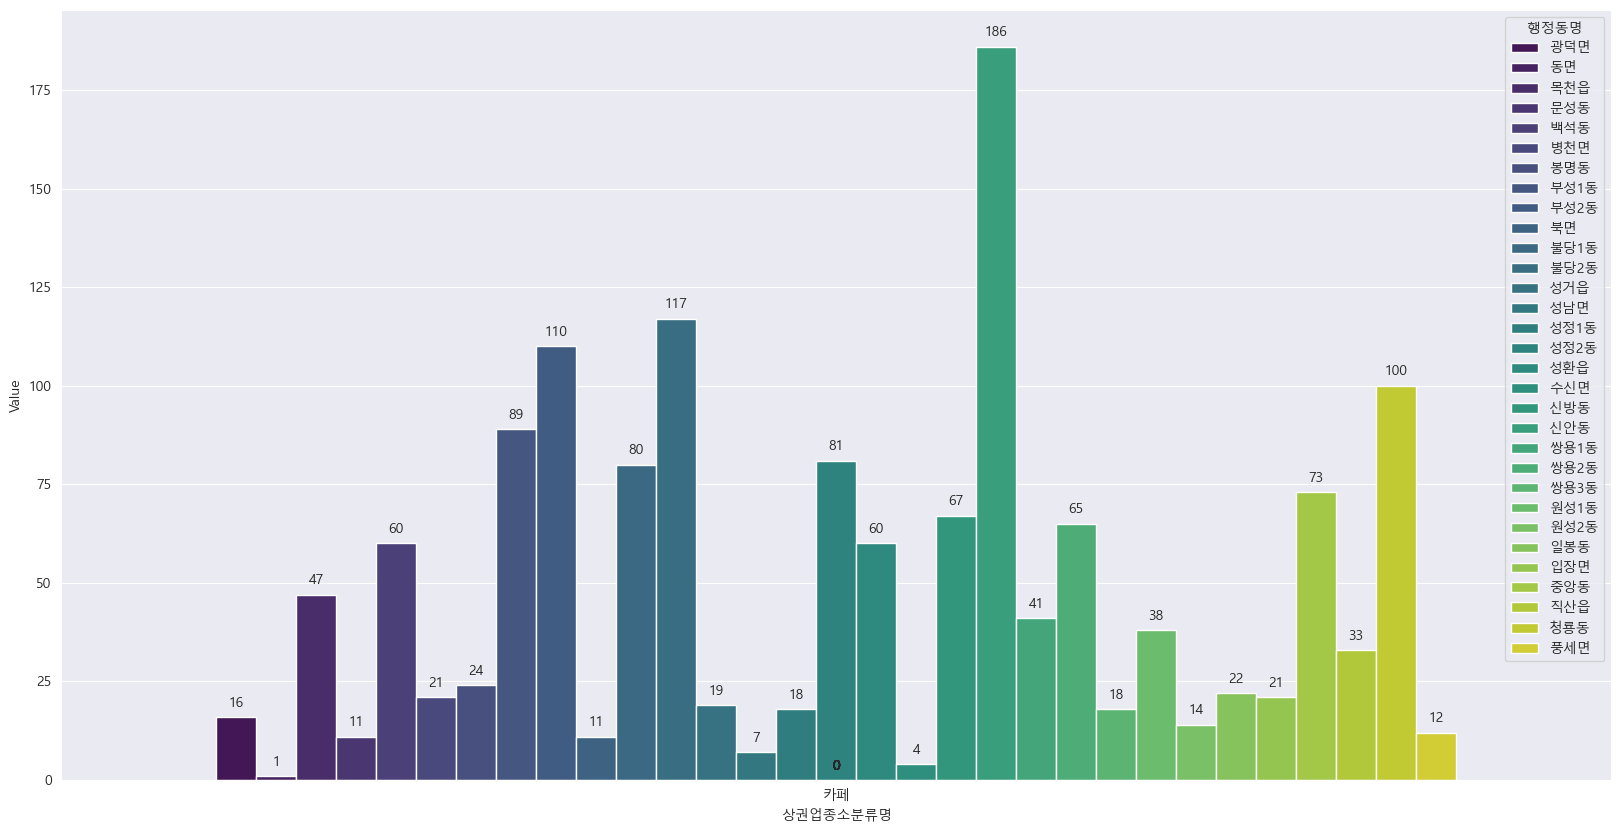

In [11]:
Si_gun_gu = Cheonan_Seo_Dong_Cafe.groupby(['상권업종소분류명', '행정동명']).size()

df = pd.DataFrame(list(Si_gun_gu.items()), columns=['Ranking', 'Value'])
df[['상권업종소분류명', '행정동명']] = pd.DataFrame(df['Ranking'].tolist(), index=df.index)

df['상권업종소분류명'] = pd.Categorical(df['상권업종소분류명'])

df['행정동명'] = pd.Categorical(df['행정동명'], ordered=True)

df.sort_values(by='상권업종소분류명', inplace=True)

plt.figure(figsize=(20, 10))
ax = sns.barplot(x='상권업종소분류명', y='Value', hue='행정동명', data=df, palette='viridis')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

In [12]:
# 충청남도 천안시 서북구만 따로 추출하여 변수 생성    ※ 충남 계룡, 보령 등 다른 지역은 상관없어서 제거
Cheonan_Seobuk = Top_Lib[Top_Lib['시군구명'] == '천안시 서북구']

# 충청남도 천안시의 데이터만 따로 추출하여 변수 생성    ※ 충남 계룡, 보령 등 다른 지역은 상관없어서 제거
Cheonan_All = Top_Lib[Top_Lib['시군구명'].str.contains('천안시')]

In [13]:
Cheonan_Seobuk.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19055 entries, 3 to 111520
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     19055 non-null  object 
 1   상호명        19055 non-null  object 
 2   지점명        423 non-null    object 
 3   상권업종대분류코드  19055 non-null  object 
 4   상권업종대분류명   19055 non-null  object 
 5   상권업종중분류코드  19055 non-null  object 
 6   상권업종중분류명   19055 non-null  object 
 7   상권업종소분류코드  19055 non-null  object 
 8   상권업종소분류명   19055 non-null  object 
 9   표준산업분류코드   19053 non-null  object 
 10  표준산업분류명    19053 non-null  object 
 11  시도코드       19055 non-null  int64  
 12  시도명        19055 non-null  object 
 13  시군구코드      19055 non-null  int64  
 14  시군구명       19055 non-null  object 
 15  행정동코드      19055 non-null  int64  
 16  행정동명       19055 non-null  object 
 17  법정동코드      19055 non-null  int64  
 18  법정동명       19055 non-null  object 
 19  지번코드       19055 non-null  int64  
 20  대지구분코드    

In [14]:
# 충청남도 천안시 서북구 
Cheonan_Seobu0k_Cafe = Cheonan_Seobuk[(Cheonan_Seobuk['상권업종소분류명'] == '카페') | 
                                      (Cheonan_Seobuk['상권업종소분류명'] == '토스트/샌드위치/샐러드') | 
                                      (Cheonan_Seobuk['상권업종소분류명'] == '빵/도넛') | 
                                      (Cheonan_Seobuk['상권업종소분류명'] == '생수/음료 소매업')]


# 충청남도 천안시 서북구 동남구 전체 
Cheonan_All_Cafe = Cheonan_All[(Cheonan_All['상권업종소분류명'] == '카페') | 
                                      (Cheonan_All['상권업종소분류명'] == '토스트/샌드위치/샐러드') | 
                                      (Cheonan_All['상권업종소분류명'] == '빵/도넛') | 
                                      (Cheonan_All['상권업종소분류명'] == '생수/음료 소매업')]

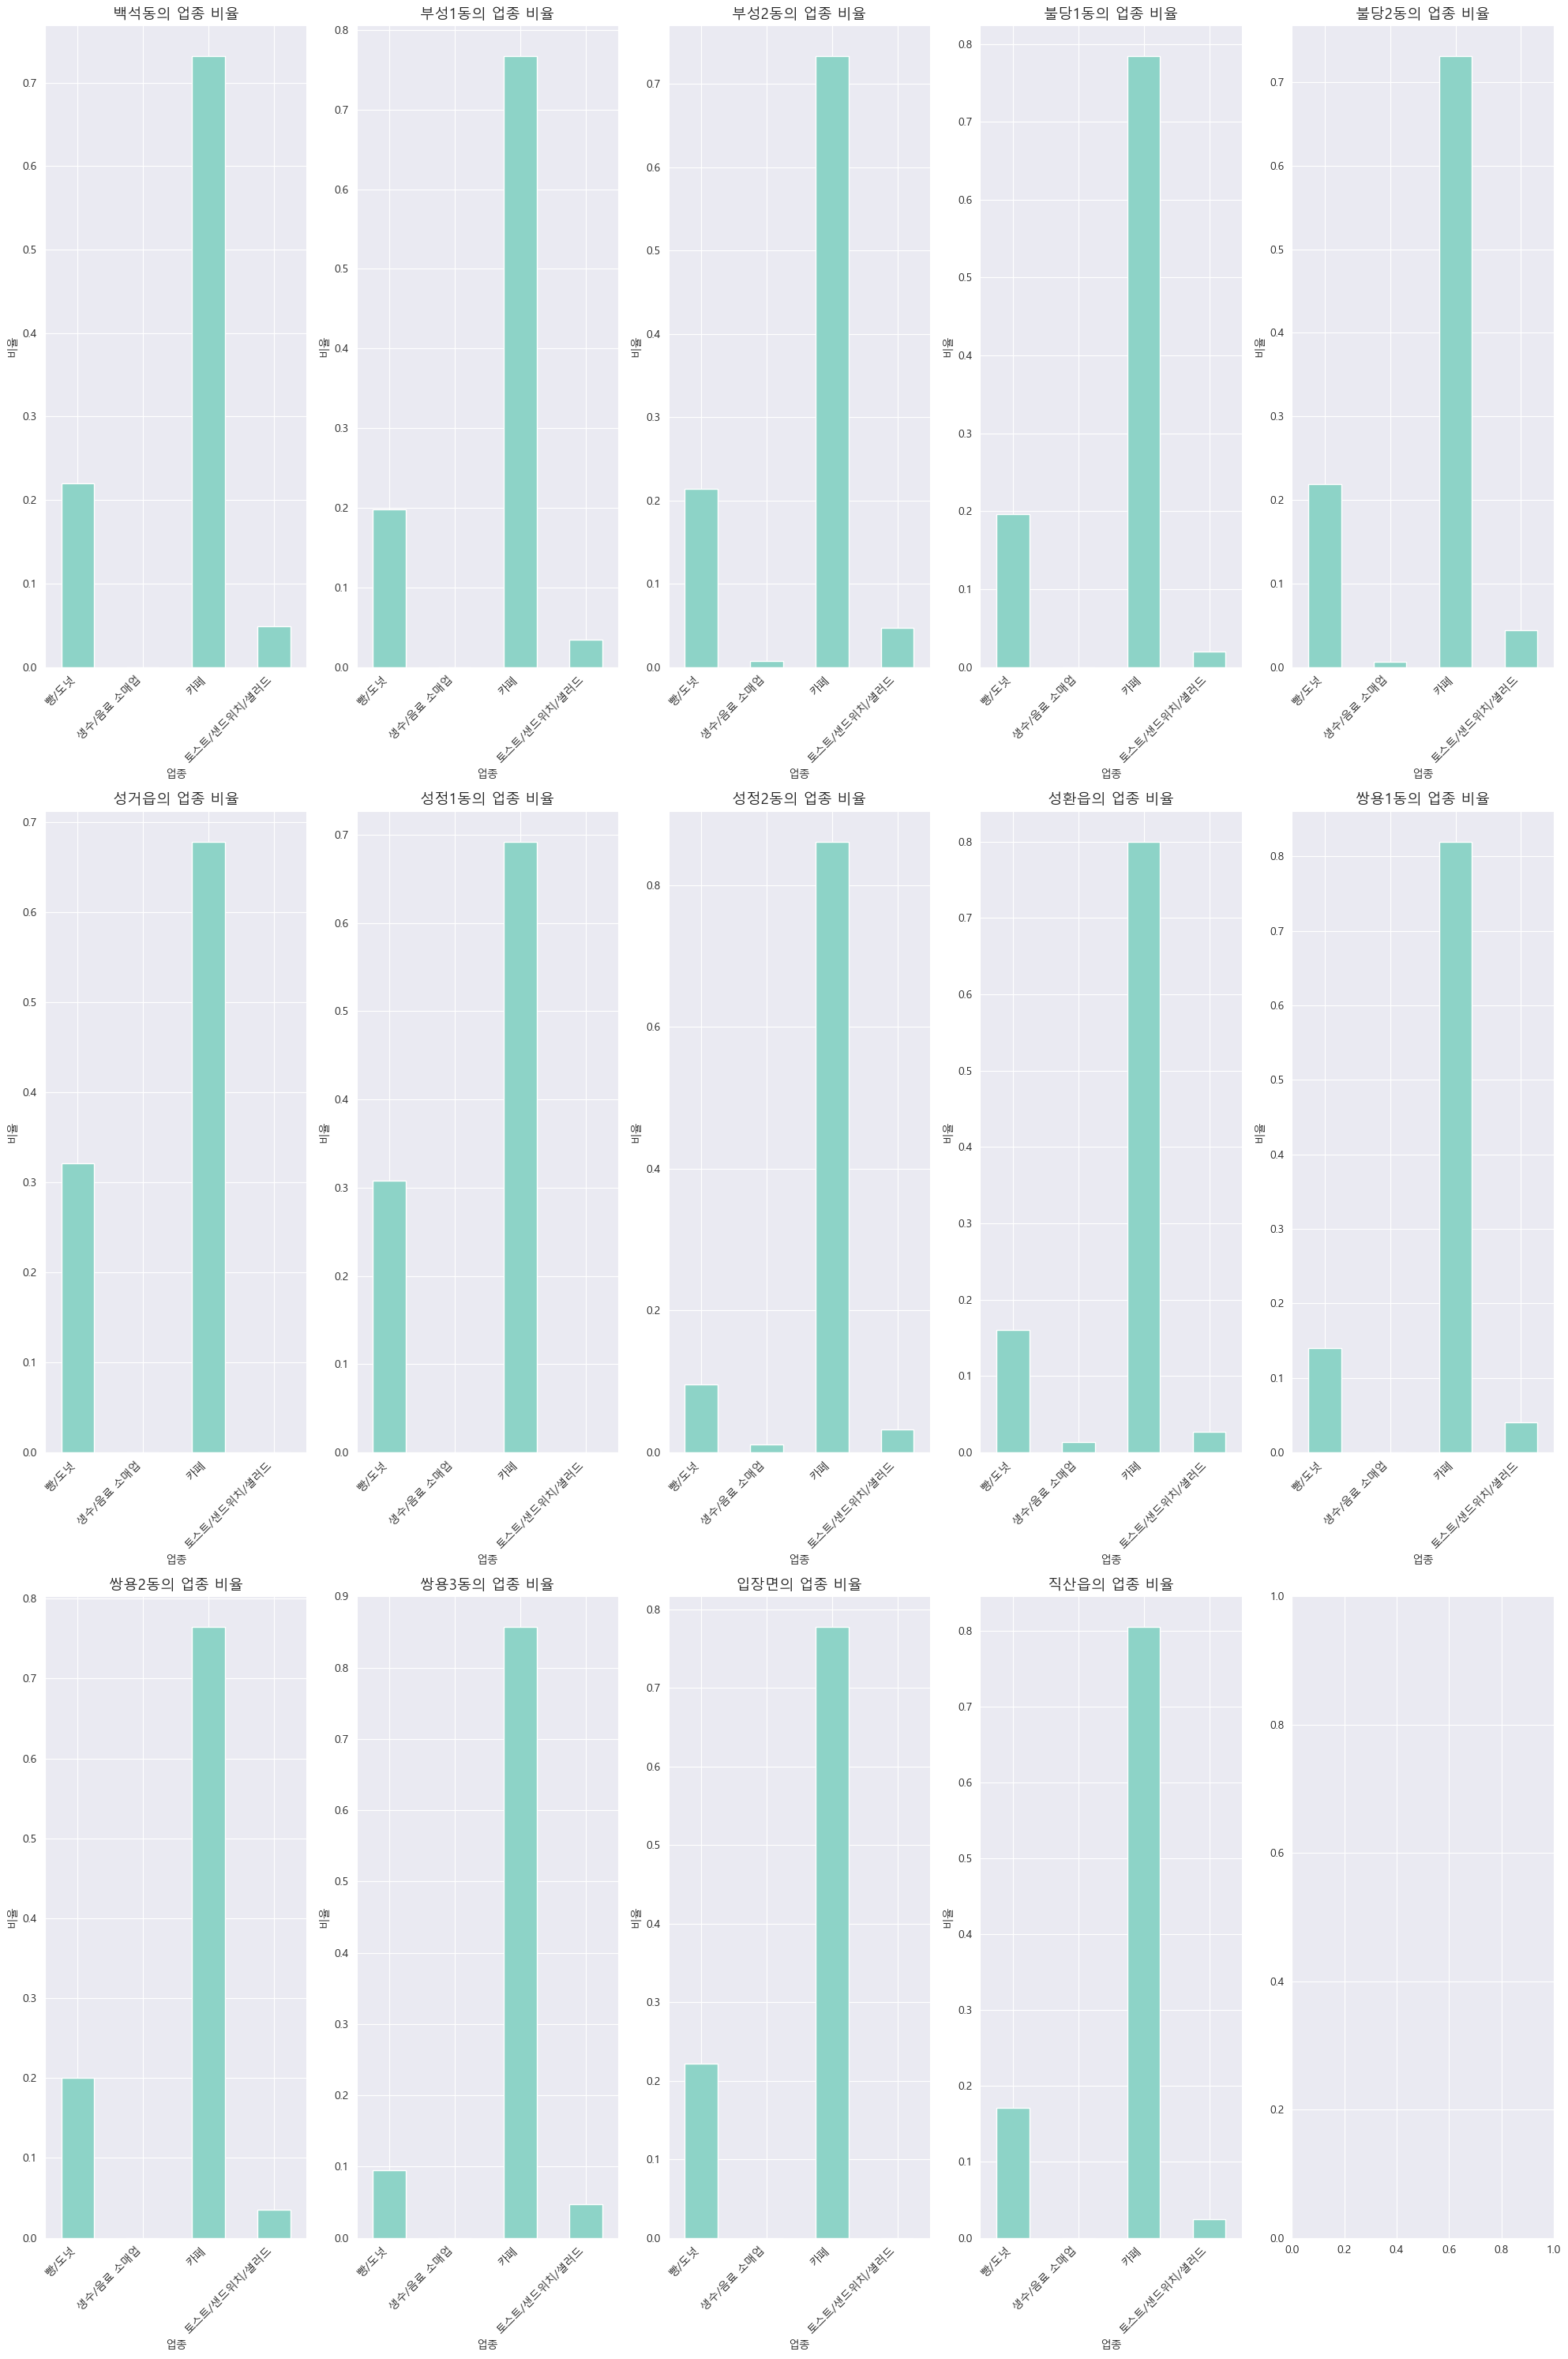

In [15]:
import matplotlib.pyplot as plt

# 분석할 업종들
target_categories = ['카페', '토스트/샌드위치/샐러드', '빵/도넛', '생수/음료 소매업']

# 특정 업종에 해당하는 데이터만 필터링
filtered_data = Cheonan_Seobu0k_Cafe[Cheonan_Seobu0k_Cafe['상권업종소분류명'].isin(target_categories)]

# 행정동별로 업종 비율 계산
grouped = filtered_data.groupby('행정동명')['상권업종소분류명'].value_counts(normalize=True).unstack().fillna(0)

# 행정동별 업종 비율을 막대 그래프로 시각화
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 30))  # 그림의 크기를 크게 조정합니다.
plt.rcParams.update({'font.size': 11})

for i, (index, row) in enumerate(grouped.iterrows()):
    ax = axes[i // 5, i % 5]  # 그리드에 대한 인덱스를 계산합니다.
    row.plot(kind='bar', ax=ax)
    ax.set_title(index + '의 업종 비율')
    ax.set_ylabel('비율')
    ax.set_xlabel('업종')
    ax.set_xticklabels(row.index, rotation=45, ha='right')  # X 축 라벨 회전
plt.tight_layout()
plt.show()


In [16]:
import folium
from folium.plugins import MarkerCluster

map = folium.Map(location=[36.8065, 127.1526], zoom_start = 13)
marker_cluster = MarkerCluster().add_to(map)

# 각 카페 위치에 마커를 추가 
# 천안시 서북구만 출력 = Cheonan_Seobu0k_Cafe
# 천안시 서북구 동남구 모두 출력 = Cheonan_All_Cafe
for index, row in Cheonan_Seobu0k_Cafe.iterrows():
    folium.Marker(
        location=[row['위도'], row['경도']],  # 위치 설정
        icon=None  # 아이콘 없이 표시
    ).add_to(marker_cluster)

# 지도 출력
map


#### 2 # 카페 프랜차이즈별 창업비용 및 고정지출에 대한 분석

In [17]:
# 필요한 패키지 import
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로드
Top_Lib2 = pd.read_excel('C:/Cafe_Test/Cafe_Data.xlsx')  # 가맹점 정보 파일명에 맞게 수정해주세요.

Top_Lib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111528 entries, 0 to 111527
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     111528 non-null  object 
 1   상호명        111528 non-null  object 
 2   지점명        1679 non-null    object 
 3   상권업종대분류코드  111528 non-null  object 
 4   상권업종대분류명   111528 non-null  object 
 5   상권업종중분류코드  111528 non-null  object 
 6   상권업종중분류명   111528 non-null  object 
 7   상권업종소분류코드  111528 non-null  object 
 8   상권업종소분류명   111528 non-null  object 
 9   표준산업분류코드   111490 non-null  object 
 10  표준산업분류명    111490 non-null  object 
 11  시도코드       111528 non-null  int64  
 12  시도명        111528 non-null  object 
 13  시군구코드      111528 non-null  int64  
 14  시군구명       111528 non-null  object 
 15  행정동코드      111528 non-null  int64  
 16  행정동명       111528 non-null  object 
 17  법정동코드      111528 non-null  int64  
 18  법정동명       111528 non-null  object 
 19  지번코드       111528 non-n

<Axes: >

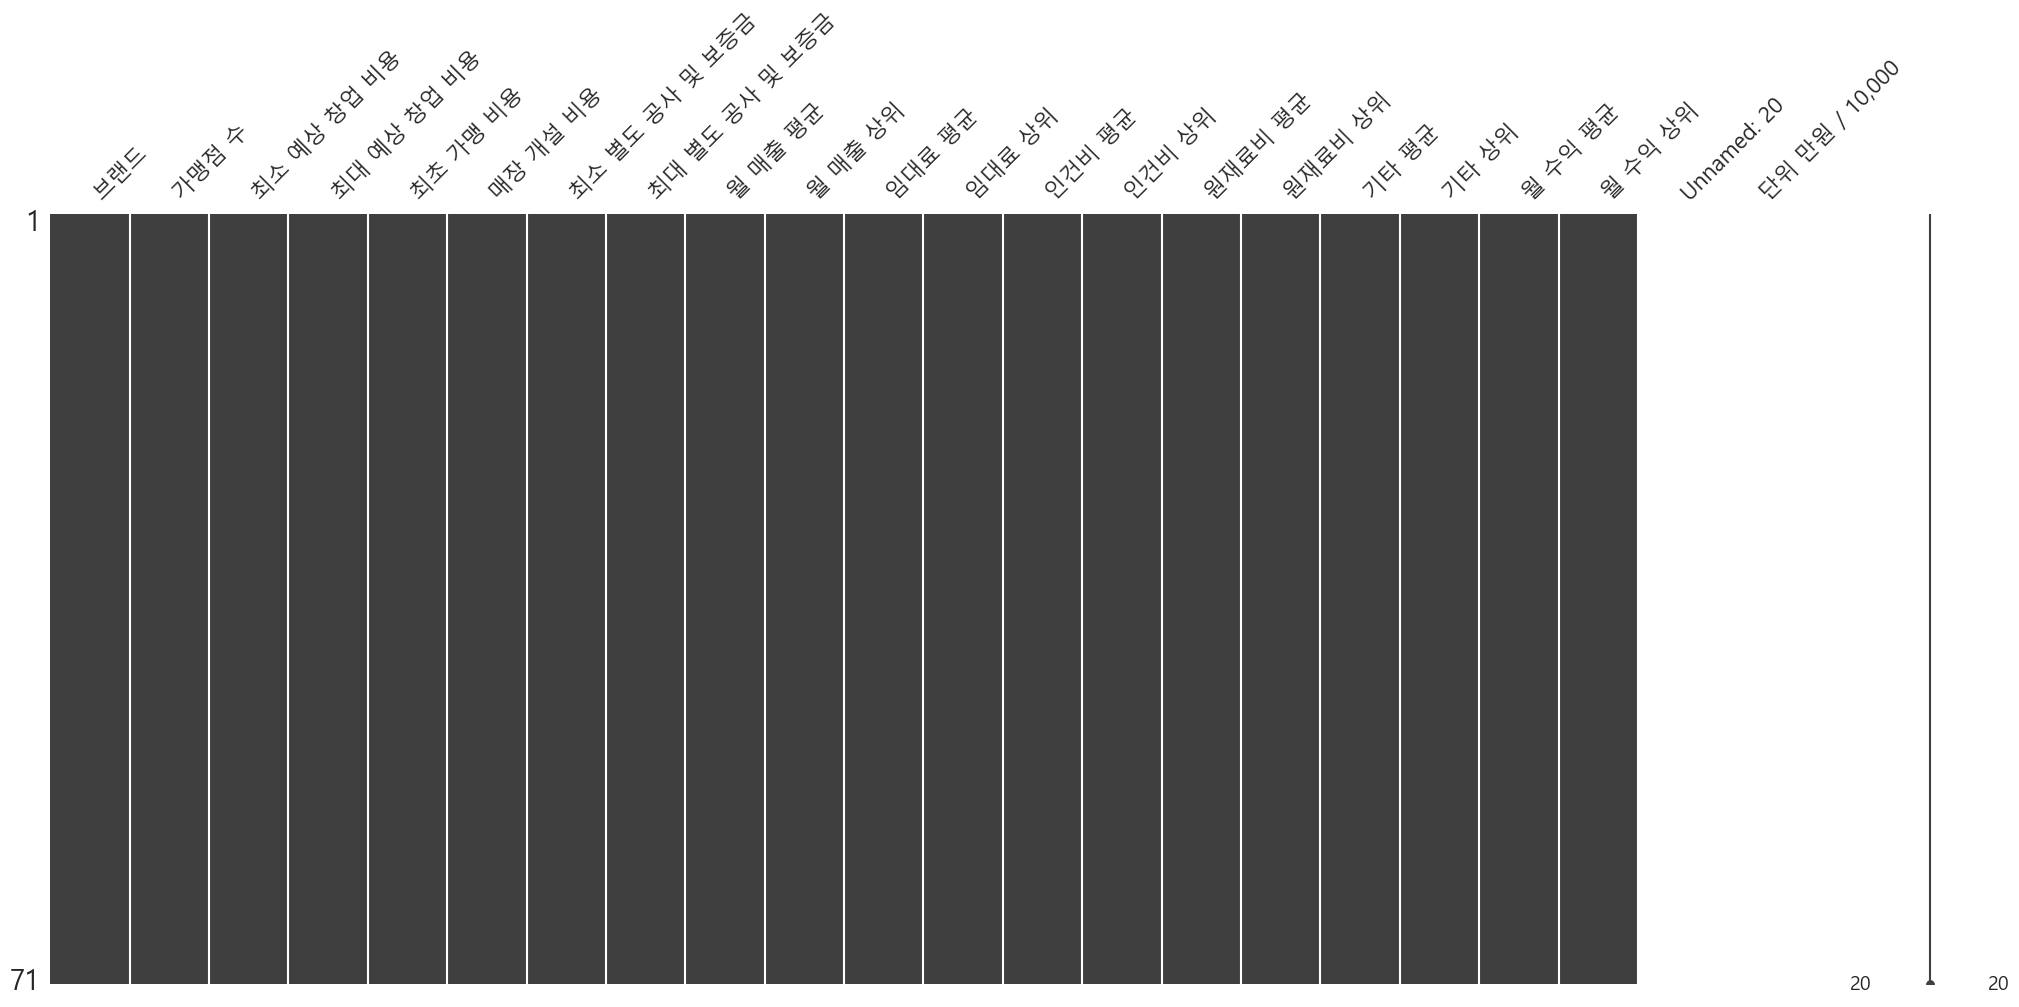

In [18]:
# 결측치 확인
msno.matrix(Top_Lib2)

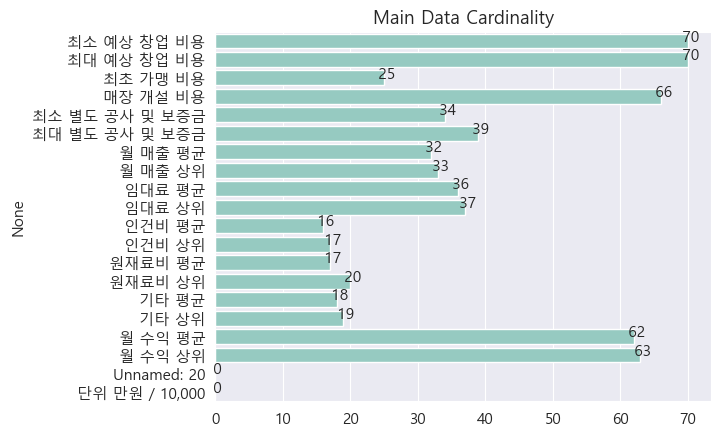

In [19]:
# 카디널리티

g = sns.barplot(
    y = Top_Lib2.nunique()[2:].index ,
    x = Top_Lib2.nunique()[2:].values
)

# 숫자 표시
for p in g.patches:
    g.text(
        p.get_x() + p.get_width() ,
        p.get_y() + (p.get_height() / 2) ,
        f"{p.get_width() : .0f}" ,
        ha = 'center'
    )

g.set_title('Main Data Cardinality')
plt.show()

In [20]:
# 파생변수 생성

# 창업비용 
Top_Lib2['평균 창업 비용'] = (Top_Lib2['최소 예상 창업 비용'] + Top_Lib2['최대 예상 창업 비용']) / 2

# 월 매출 
Top_Lib2['평균 월 매출'] = (Top_Lib2['월 매출 평균'] + Top_Lib2['월 매출 상위']) / 2

# 임대료
Top_Lib2['평균 임대료 비용'] = (Top_Lib2['임대료 평균'] + Top_Lib2['임대료 상위']) / 2

# 인건비
Top_Lib2['평균 인건비 비용'] = (Top_Lib2['인건비 평균'] + Top_Lib2['인건비 상위']) / 2

# 원재료비
Top_Lib2['평균 원재료 비용'] = (Top_Lib2['원재료비 평균'] + Top_Lib2['원재료비 상위']) / 2

#기타
Top_Lib2['평균 기타 비용'] = (Top_Lib2['기타 평균'] + Top_Lib2['기타 상위']) / 2

#월 수익
Top_Lib2['평균 월 수익'] = (Top_Lib2['월 수익 평균'] + Top_Lib2['월 수익 상위']) / 2

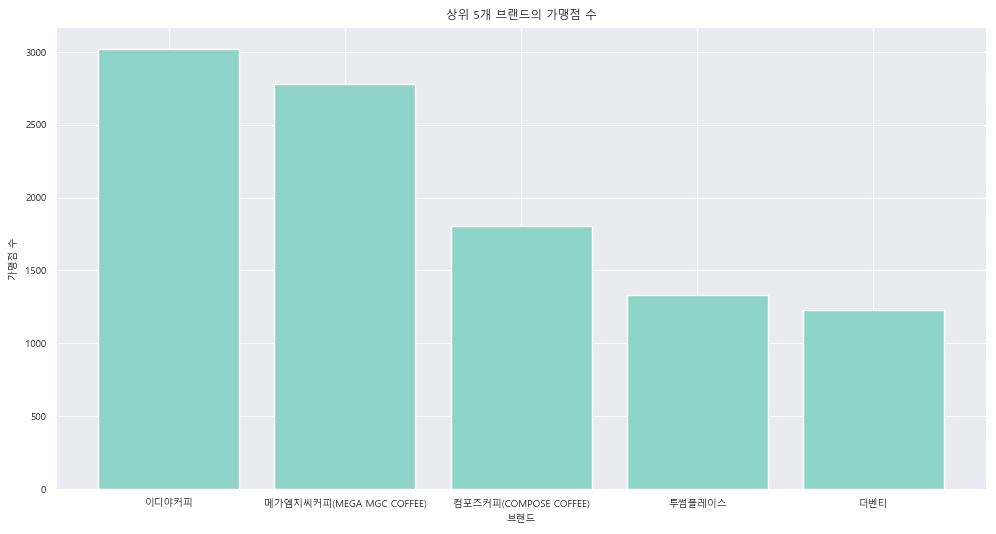

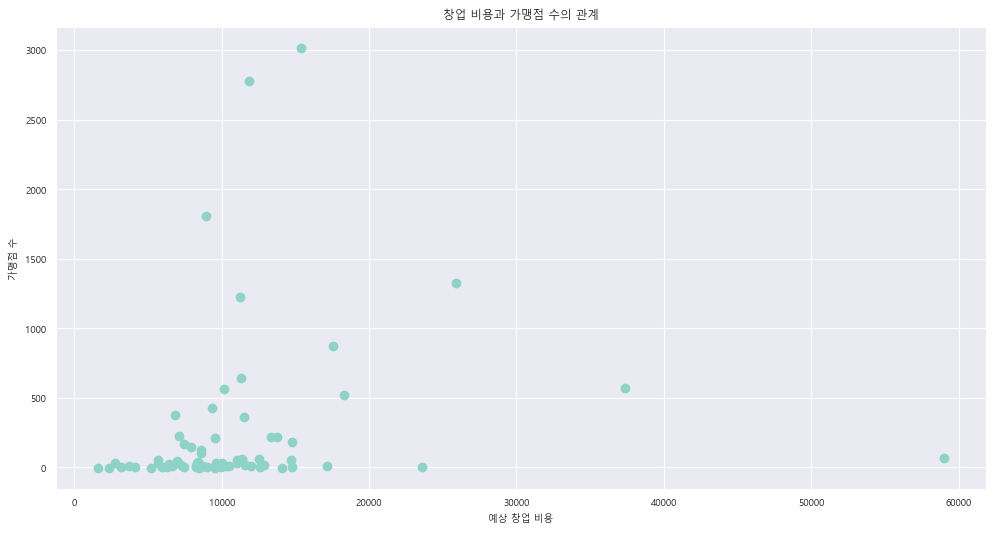

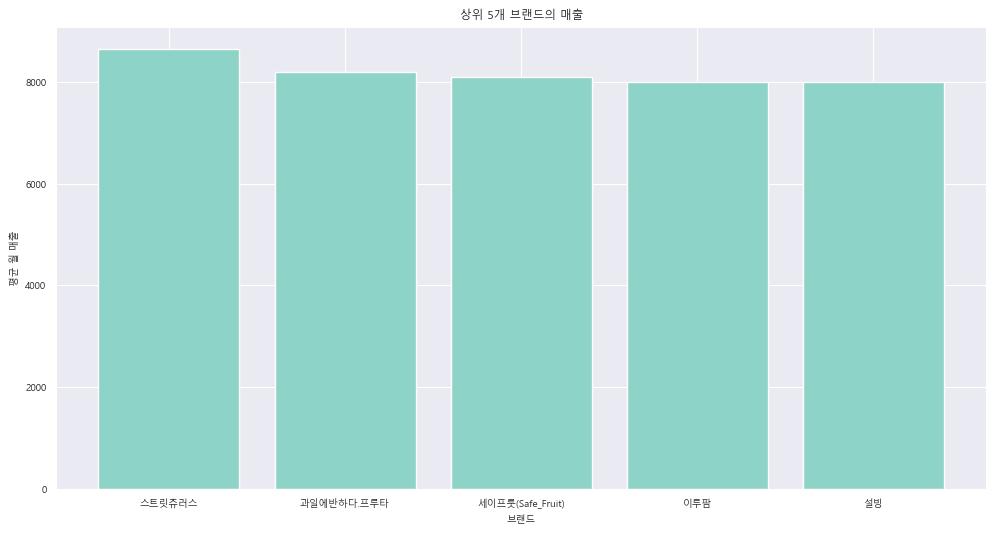

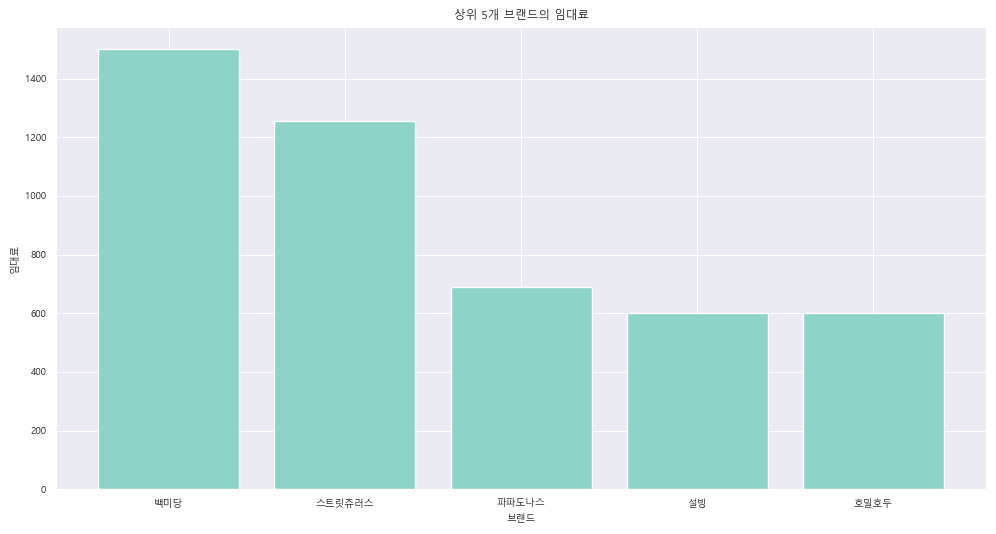

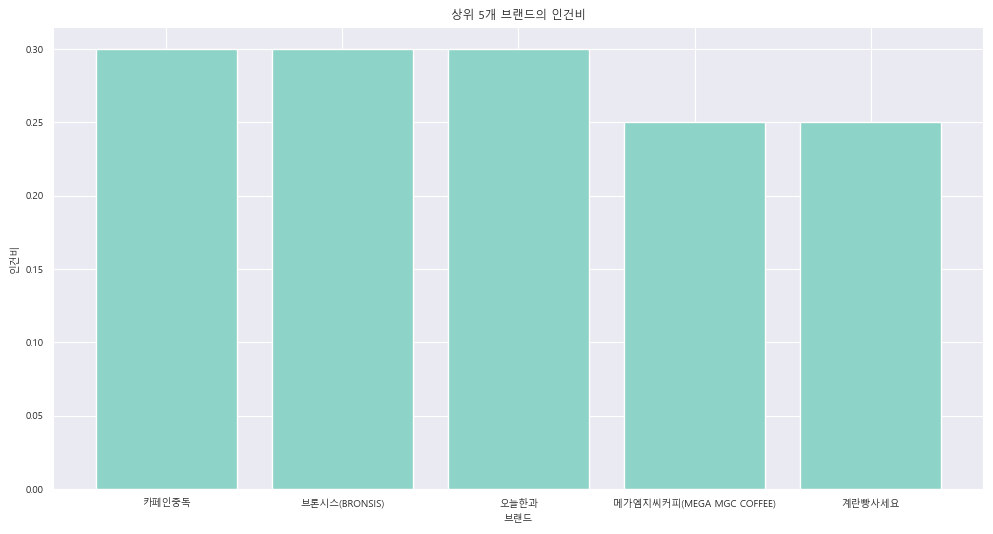

In [21]:

# 가맹점 수 분석
total_franchise_count = Top_Lib2['가맹점 수'].sum()
top_franchise_counts = Top_Lib2.nlargest(5, '가맹점 수')  # 상위 5개 가맹점 수

# 폰트 사이즈
plt.rcParams.update({'font.size': 7})
# 가맹점 수 시각화
plt.figure(figsize=(12, 6))
plt.bar(top_franchise_counts['브랜드'], top_franchise_counts['가맹점 수'])
plt.xlabel('브랜드')
plt.ylabel('가맹점 수')
plt.title('상위 5개 브랜드의 가맹점 수')
plt.show()

# 창업 비용 분석
min_startup_cost = Top_Lib2['최소 예상 창업 비용'].min()
max_startup_cost = Top_Lib2['최대 예상 창업 비용'].max()


# 창업 비용과 가맹점 수의 관계 분석
plt.figure(figsize=(12, 6))
plt.scatter(Top_Lib2['평균 창업 비용'], Top_Lib2['가맹점 수'])
plt.xlabel('예상 창업 비용')
plt.ylabel('가맹점 수')
plt.title('창업 비용과 가맹점 수의 관계')
plt.show()


# 매출 분석
average_sales = Top_Lib2['평균 월 매출'].mean()
top_sales = Top_Lib2.nlargest(5, '평균 월 매출')  # 상위 5개 매출

# 매출 시각화
plt.figure(figsize=(12, 6))
plt.bar(top_sales['브랜드'], top_sales['평균 월 매출'])
plt.xlabel('브랜드')
plt.ylabel('평균 월 매출')
plt.title('상위 5개 브랜드의 매출')
plt.show()

# 임대료 분석
average_rent = Top_Lib2['평균 임대료 비용'].mean()
top_rent = Top_Lib2.nlargest(5, '평균 임대료 비용')  # 상위 5개 임대료

# 임대료 시각화
plt.figure(figsize=(12, 6))
plt.bar(top_rent['브랜드'], top_rent['평균 임대료 비용'])
plt.xlabel('브랜드')
plt.ylabel('임대료')
plt.title('상위 5개 브랜드의 임대료')
plt.show()

# 인건비 분석
average_labor_cost = Top_Lib2['평균 인건비 비용'].mean()
top_labor_cost = Top_Lib2.nlargest(5, '평균 인건비 비용')  # 상위 5개 인건비

# 인건비 시각화
plt.figure(figsize=(12, 6))
plt.bar(top_labor_cost['브랜드'], top_labor_cost['평균 인건비 비용'])
plt.xlabel('브랜드')
plt.ylabel('인건비')
plt.title('상위 5개 브랜드의 인건비')
plt.show()


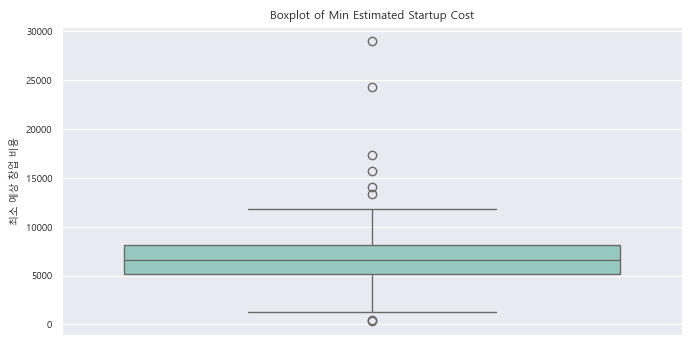

In [22]:
import seaborn as sns

# Boxplot을 이용한 이상치 탐색
plt.figure(figsize=(8, 4))
sns.boxplot(data=Top_Lib2['최소 예상 창업 비용'])
plt.title('Boxplot of Min Estimated Startup Cost')
plt.show()


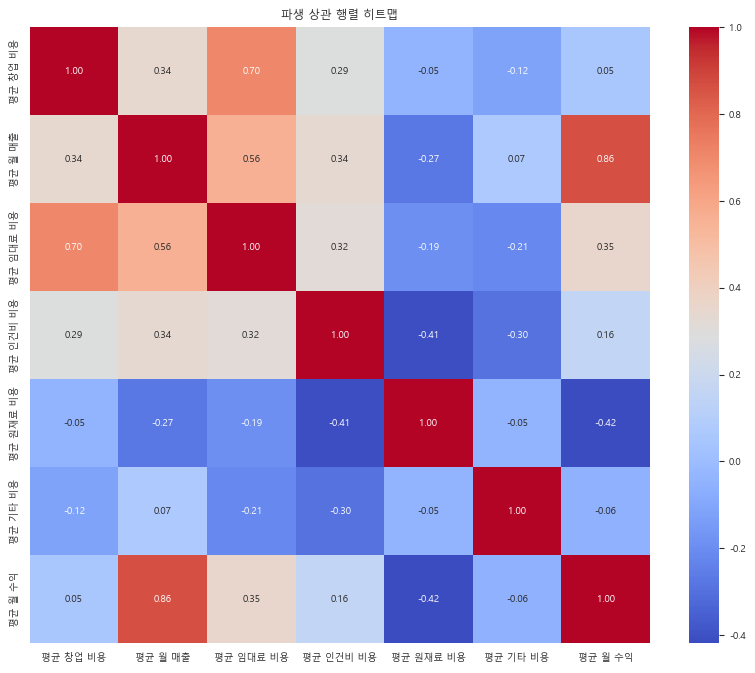

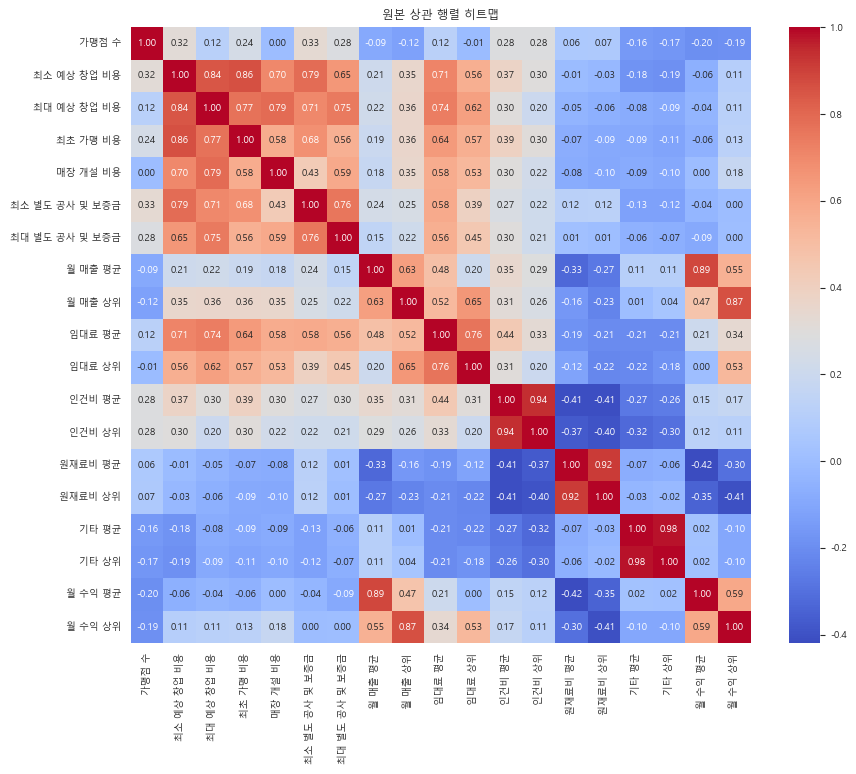

In [35]:
# 상관 행렬 계산
variable_correlation_matrix = Top_Lib2[['평균 창업 비용', '평균 월 매출', '평균 임대료 비용', '평균 인건비 비용', '평균 원재료 비용', '평균 기타 비용', '평균 월 수익']].corr()

original_correlation_matrix = Top_Lib2[['가맹점 수','최소 예상 창업 비용','최대 예상 창업 비용','최초 가맹 비용','매장 개설 비용','최소 별도 공사 및 보증금','최대 별도 공사 및 보증금','월 매출 평균','월 매출 상위','임대료 평균','임대료 상위','인건비 평균','인건비 상위','원재료비 평균','원재료비 상위','기타 평균','기타 상위','월 수익 평균','월 수익 상위']].corr()

# 파생변수 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(variable_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('파생 상관 행렬 히트맵')


# 원본 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(original_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('원본 상관 행렬 히트맵')
plt.show()

In [24]:
# 유의미한 상관관계 식별

In [25]:
# 인과관계 분석

In [26]:
# 다중공선성 확인

In [27]:
# 비선형 관계 탐색